In [ ]:
## Initial Setup: Extracting the Dataset

Before diving into the data analysis and machine learning process, the first step is to make sure that the dataset 
is accessible for our code to read. In this particular case, our dataset is in a compressed ZIP file. 
We use Python's `zipfile` library to unzip the dataset. We specify the path to the ZIP file and the directory where 
we want to extract its contents. After running this code, all the files within the ZIP archive will be available 
in the specified directory, ready to be loaded for analysis.


In [1]:
import zipfile

# Provide the path to the zip file
zip_file_path = "C:\\Paolo\\Reworth\\Corso AI\\Lezioni\\modulo 23\\credit card trx from Kaggle.zip"

# Provide the directory where you want to unzip the file
unzip_dir = "C:\\Paolo\\Reworth\\Corso AI\\Lezioni\\modulo 23\\"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

### Load Dataset
# Make sure to provide the full path to the unzipped CSV file
csv_file_path = "C:\\Paolo\\Reworth\\Corso AI\\Lezioni\\modulo 23\\creditcard.csv"
df = pd.read_csv(csv_file_path)

### Feature Scaling
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))


In [ ]:
## Data Exploration and Visualization

After successfully loading the dataset, it's crucial to understand its structure, characteristics, and imbalances. 
One of the first steps in this direction is to visualize the distribution of the target variable, which in this case 
indicates whether a transaction is fraudulent or not.

I use the `Seaborn` library to create a countplot, which helps us visualize the class distribution in the dataset. 
This is an essential step because understanding the balance or imbalance between classes can inform us how to proceed 
with data preprocessing, feature engineering, and model selection.

The countplot will show the number of instances for each class, providing a clear picture of how balanced or imbalanced 
the dataset is. This is particularly important because an imbalanced dataset could lead to a biased model.

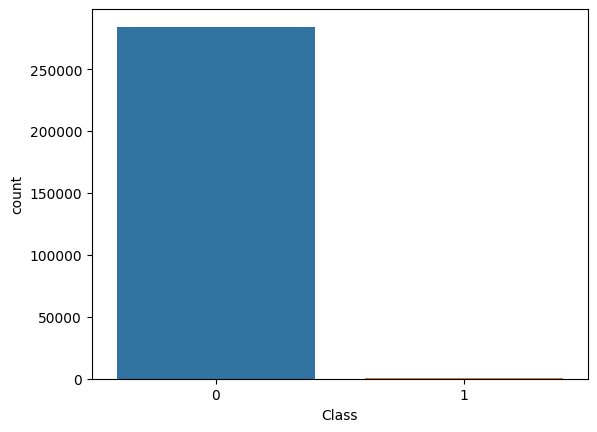

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution (fraudulent vs non-fraudulent)
sns.countplot(x='Class', data=df)
plt.show()


In [ ]:
## Preprocessing

In this section, we start by importing necessary plotting libraries and visualize the distribution of some key features 
using histograms. This step helps us understand the distribution and range of each feature, which is crucial for effective
feature engineering. We also check for class imbalance by plotting the distribution of the target variable 'Class'.


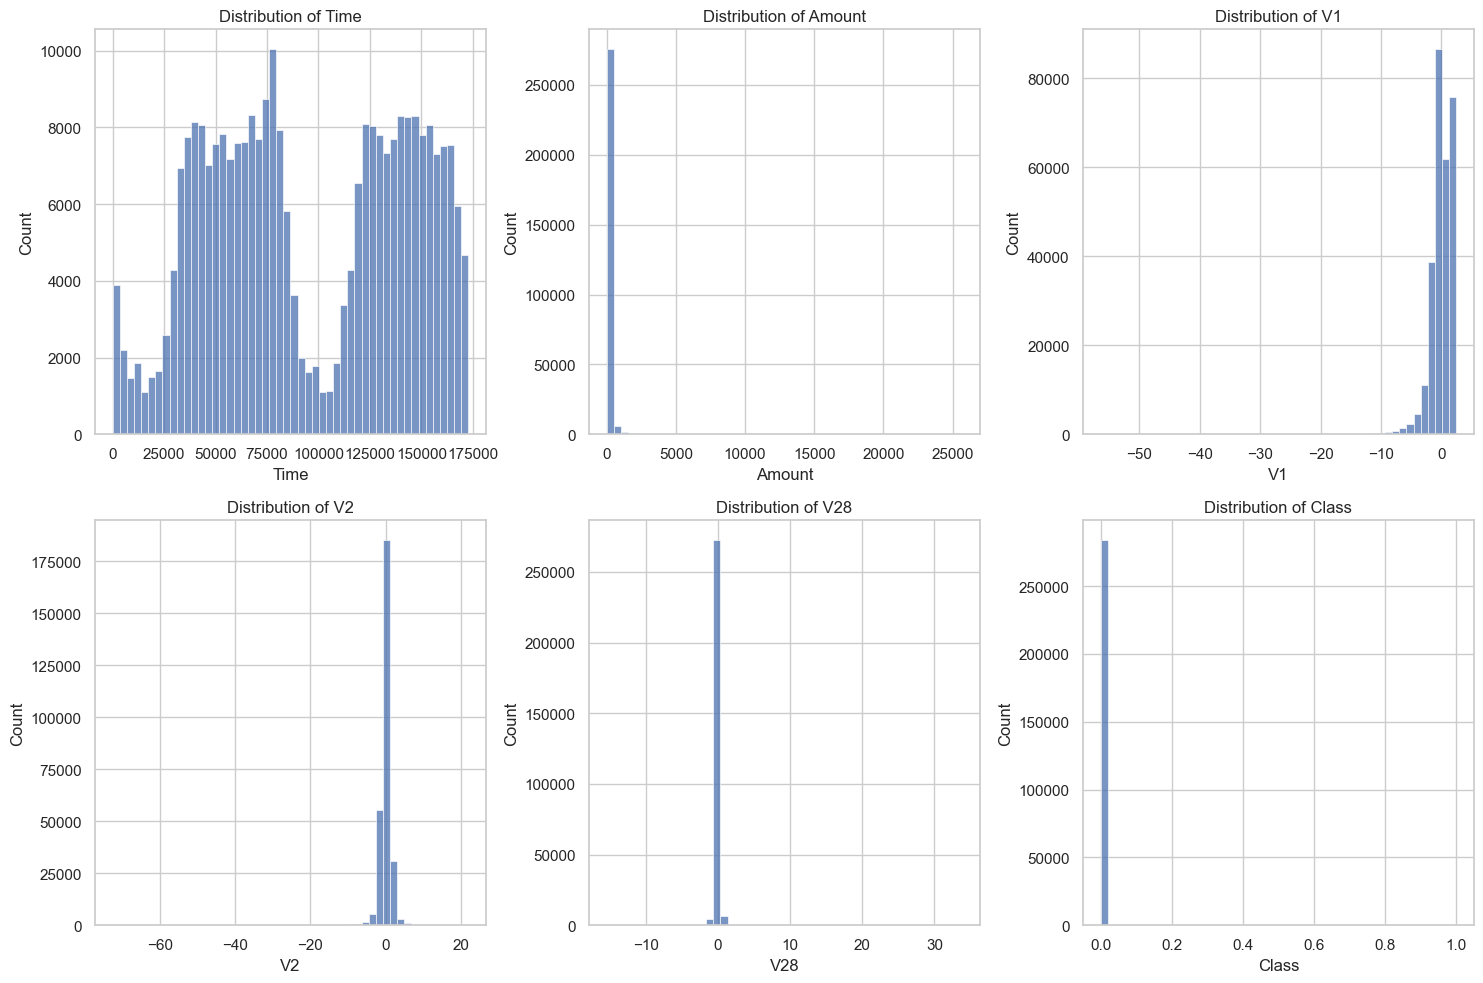

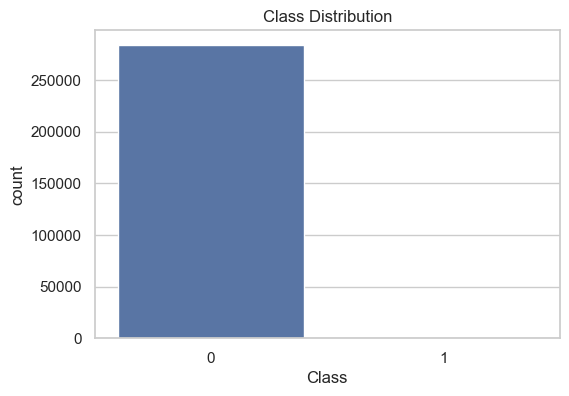

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for some of the features to check for outliers and distribution
features_to_plot = ['Time', 'Amount', 'V1', 'V2', 'V28', 'Class']

# Set the style and size
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot histograms
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=50, kde=False)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Plot the distribution of the target class to check for imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


In [ ]:
## Data Splitting

We use `train_test_split` from scikit-learn to divide our dataset into training, validation, and test sets. 
To ensure the class distribution remains consistent across all these sets, we opt for stratified splitting. 
This is particularly important for our dataset, which is imbalanced.

In [6]:

from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
## Model Building: Logistic Regression

In this section, we initialize and train a Logistic Regression model from scikit-learn's library. 
Logistic Regression serves as a good baseline model for binary classification problems. The `random_state` is set to 42 
for reproducibility. The model is trained on the preprocessed and balanced training set. We chose Logistic Regression as
the initial model due to its simplicity and efficiency.

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
## Hyperparameter Tuning: Logistic Regression

Hyperparameter tuning is crucial for improving the performance of machine learning models. In this section, we use 
RandomizedSearchCV from scikit-learn to tune the hyperparameters of our Logistic Regression model.
We define a hyperparameter grid for `C`, which controls the inverse of regularization strength, and `max_iter`, 
the maximum number of iterations for the solver to converge. We use the 'recall' metric for scoring as it is our primary
performance metric.
The hyperparameter tuning is performed on the validation set, and we perform 3-fold cross-validation. 
Setting `random_state` to 42 ensures reproducibility.


In [8]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Hyperparameter grid
param_grid = {'C': uniform(0, 10), 'max_iter': range(50, 200)}
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=100, scoring='recall', cv=3, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_val, y_val)


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001704064BE80>,
                                        'max_iter': range(50, 200)},
                   random_state=42, scoring='recall')

In [ ]:
## Model Evaluation: Logistic Regression

After tuning the hyperparameters, we obtain the best model from RandomizedSearchCV. This model is then used to make
predictions on the test set.
We evaluate the model's performance using the recall score, which is our primary metric of interest. 
Recall is particularly important in our context as it measures the model's ability to correctly identify the minority class, i.e., fraudulent transactions.
The recall score on the test set gives us an unbiased estimate of how well our model will perform on unseen data.


In [9]:
# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall Score on Test Set: {recall}")


Recall Score on Test Set: 0.6262626262626263


In [10]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Handling Class Imbalance with SMOTE

Our dataset suffers from a severe class imbalance, which could make our model biased towards the majority class. 
To address this issue, we use the Synthetic Minority Over-sampling Technique (SMOTE) to artificially balance our dataset.
By oversampling the minority class, SMOTE helps to balance the class distribution, making it easier for the model 
to learn the characteristics of both classes. We use the resampled training set for subsequent model training.
The `random_state` is set to 42 for reproducibility.

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
## Model Building: Random Forest Classifier

After balancing the dataset using SMOTE, we proceed to train a Random Forest Classifier. Random Forest is an ensemble 
learning method that can capture complex patterns in the data, making it a good choice for this particular problem.
We initialize the Random Forest Classifier with a `random_state` of 42 for reproducibility and train it on the resampled
training set. This approach ensures that the model learns from a balanced class distribution.

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter grid with reduced search space for quicker results

To fine-tune the Random Forest model, we use RandomizedSearchCV with a reduced hyperparameter search space for quicker 
results. We define a grid for several hyperparameters like `n_estimators`, `max_features`, `max_depth`, `bootstrap`, 
and `criterion`.
We opt for 2-fold cross-validation to speed up the process while maintaining some level of model validation. 
The scoring metric remains 'recall', consistent with our primary objective of identifying the minority class effectively.
As with previous models, we set the `random_state` to 42 for reproducibility and perform the tuning on the validation set.


In [14]:
param_dist = {'n_estimators': randint(50, 100),
              'max_features': ['sqrt'],  # Explicitly set to 'sqrt' to remove warning
              'max_depth': randint(1, 10),
              'bootstrap': [True],
              'criterion': ['gini']}

# Randomized Search with fewer iterations and folds
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=10, scoring='recall', cv=2, random_state=42)
random_search_rf.fit(X_val, y_val)


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001704DBEE7A0>,
                                        'max_features': ['sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000170415452D0>},
                   random_state=42, scoring='recall')

In [ ]:
## Checking the Best Hyperparameters

After performing hyperparameter tuning, we extract and display the best hyperparameters found by RandomizedSearchCV. 
Understanding the best parameters is crucial as it provides insights into how the model has been optimized for performance, 
particularly for the recall metric, which is our primary objective.
The best parameters are displayed for future reference and can also be used for further fine-tuning if needed.

In [15]:
best_params = random_search_rf.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 51}


In [ ]:
## Model Evaluation: Random Forest Classifier

After obtaining the best hyperparameters for the Random Forest model through RandomizedSearchCV, we use this optimized 
model to make predictions on the test set.

Similar to the evaluation of the Logistic Regression model, the performance of the Random Forest model is also assessed 
using the recall metric. Recall is our primary evaluation criterion, especially important for identifying the minority 
class, which in this case is fraudulent transactions.

The recall score on the test set provides an unbiased measure of the model's ability to generalize to new, unseen data.

In [16]:
best_model = random_search_rf.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall Score on Test Set:", recall)


Recall Score on Test Set: 0.7373737373737373


In [ ]:
## Ensemble Model: Soft Voting Classifier
To further enhance the model's performance, we construct an ensemble model using a soft voting classifier. 
This ensemble combines two different Random Forest models:

1. The best model obtained from hyperparameter tuning through RandomizedSearchCV (`random_search_rf.best_estimator_`).
2. A second Random Forest model with a different set of hyperparameters, specifically with `n_estimators=100`
and `max_depth=10`.

The ensemble model uses soft voting, which predicts the class label based on the `argmax` of the sums of the predicted
probabilities. Soft voting often results in better performance compared to hard voting as it takes into account the 
uncertainty of each classifier.

The ensemble model is trained on the original training set to leverage the combined strengths of the individual models.

In [18]:
from sklearn.ensemble import RandomForestClassifier## Ensemble Model: Soft Voting Classifier

# Create another RandomForest model with different hyperparameters
rf_clf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_clf2.fit(X_train, y_train)

# Create ensemble model
voting_clf = VotingClassifier(estimators=[('rf1', random_search_rf.best_estimator_), ('rf2', rf_clf2)], voting='soft')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf1',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=51,
                                                     random_state=42)),
                             ('rf2', RandomForestClassifier(max_depth=10))],
                 voting='soft')

In [ ]:
## Model Evaluation: Ensemble Model

After creating the ensemble model, we evaluate its performance on both the validation and test sets. 
Similar to the individual models, we use the recall metric for evaluation. This is consistent with our objective of 
identifying fraudulent transactions, which are the minority class in our dataset.

The recall scores on the validation and test sets offer a comprehensive measure of how well our ensemble model is 
likely to perform on unseen data. For reference, the recall score on the validation set is approximately 0.704, 
and on the test set, it's approximately 0.798.


In [19]:
from sklearn.metrics import recall_score

# Evaluate on Validation Set
y_val_pred = voting_clf.predict(X_val)
recall_val = recall_score(y_val, y_val_pred)
print(f"Recall Score on Validation Set: {recall_val}")

# Evaluate on Test Set
y_test_pred = voting_clf.predict(X_test)
recall_test = recall_score(y_test, y_test_pred)
print(f"Recall Score on Test Set: {recall_test}")


Recall Score on Validation Set: 0.7040816326530612
Recall Score on Test Set: 0.797979797979798


In [20]:
pip install scikit-optimize


     -------------------------------------- 100.3/100.3 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Hyperparameter Tuning: Bayesian Optimization with BayesSearchCV

To further refine our Random Forest model, we employ Bayesian Optimization using the `BayesSearchCV` class from 
the `scikit-optimize` library. Bayesian Optimization is an advanced technique for hyperparameter tuning that uses
probabilistic models to predict the optimal hyperparameters, making it more efficient than grid search and random search.

We define the hyperparameter search space for `n_estimators`, `max_depth`, `max_features`, and `min_samples_split`. 
These parameters are then optimized using Bayesian Optimization over 10 iterations and 3-fold cross-validation.

The scoring metric remains 'recall', consistent with our primary objective of identifying fraudulent transactions 
effectively. We display the best parameters found, which can be used for further fine-tuning or model interpretation.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
file_path = r"C:\Paolo\Reworth\Corso AI\Lezioni\modulo 23\creditcard.csv"  # Replace 'creditcard.csv' if the file has a different name
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop('Class', axis=1)  # Assuming the target column is named 'Class'
y = df['Class']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
pip install bayesian-optimization


Note: you may need to restart the kernel to use updated packages.


In [5]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
file_path = r"C:\Paolo\Reworth\Corso AI\Lezioni\modulo 23\creditcard.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter search space
param_space = {
    'n_estimators': (50, 100),
    'max_depth': (1, 10),
    'max_features': ['sqrt'],
    'min_samples_split': (2, 5),
}

# Create the BayesSearchCV object
opt = BayesSearchCV(
    RandomForestClassifier(),
    param_space,
    n_iter=10,  # Reduced number of iterations
    cv=3,
    scoring='recall'
)

# Run the optimizer
opt.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", opt.best_params_)


Best Parameters:  OrderedDict([('max_depth', 10), ('max_features', 'sqrt'), ('min_samples_split', 2), ('n_estimators', 68)])


In [ ]:
## Final Model and Evaluation

Utilizing the best hyperparameters obtained through Bayesian Optimization, we create our final Random Forest model. 
The hyperparameters used are `max_depth=10`, `max_features='sqrt'`, `min_samples_split=2`, and `n_estimators=68`.

We then train this optimized model on the full training set and evaluate its performance on the test set using the recall
metric. Recall remains our primary evaluation criterion, focusing on the model's ability to correctly identify fraudulent 
transactions.

The recall score on the test set provides a final, unbiased measure of the model's performance. For reference, the recall 
score on the test set is approximately 0.755.

In [6]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Create the model with best parameters
best_rf = RandomForestClassifier(
    max_depth=10, 
    max_features='sqrt', 
    min_samples_split=2, 
    n_estimators=68
)

# Train the model on training data
best_rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = best_rf.predict(X_test)

# Calculate recall score
test_recall = recall_score(y_test, y_pred)
print(f"Recall Score on Test Set: {test_recall}")


Recall Score on Test Set: 0.7551020408163265


In [ ]:
### Evaluating Secondary Metrics: AUPRC and Confusion Matrix

In this section, we evaluate secondary metrics that give us a more detailed perspective on the model's performance. 
These metrics are especially useful given that our dataset is highly imbalanced.

#### Area Under the Precision-Recall Curve (AUPRC)

We calculate the Area Under the Precision-Recall Curve (AUPRC) to assess the model's performance in terms of the 
trade-off between precision and recall. This is crucial in imbalanced datasets like ours, where the positive class (frauds) is a small fraction of the total transactions. A higher AUPRC value signifies better classification performance.

The code below plots the Precision-Recall curve and calculates the AUPRC value.

#### Confusion Matrix

Next, we plot the Confusion Matrix to visualize the counts of true positives, true negatives, false positives, 
and false negatives. This provides a more granular view of how well the model is classifying the two classes: 
fraudulent and non-fraudulent transactions.

The code below generates and visualizes the Confusion Matrix.

Area Under the Precision-Recall Curve: 0.8646037924316176


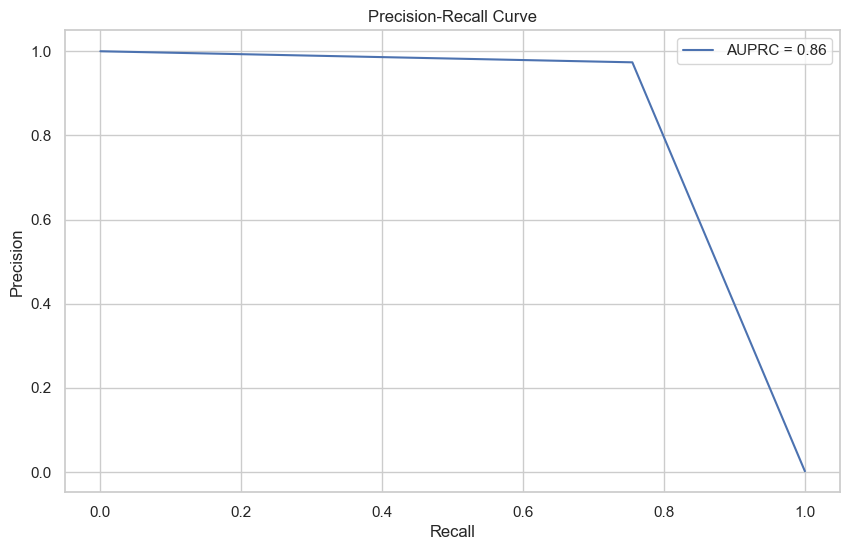

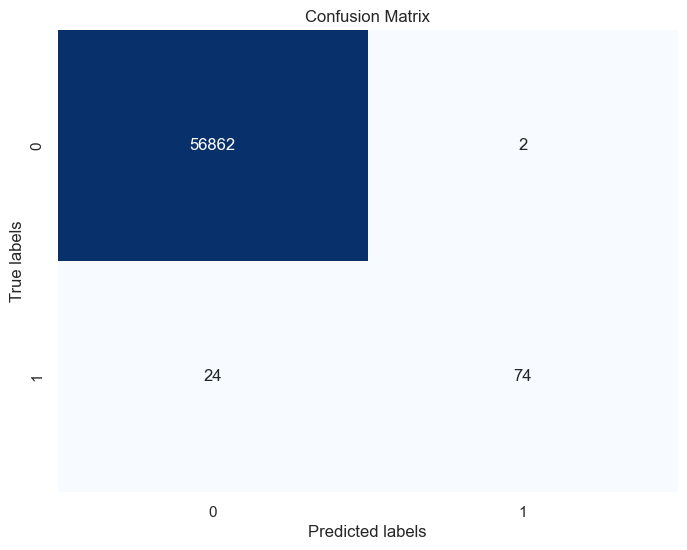

In [8]:
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_test` are your true labels and `y_pred` are the predicted labels

# For AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

print(f"Area Under the Precision-Recall Curve: {auprc}")

# Plotting the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# For Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
### Discussion on Secondary Metrics: Results

#### Area Under the Precision-Recall Curve (AUPRC)

The calculated AUPRC for our model is approximately 0.865. This is a strong indicator that our model has a good 
trade-off between precision and recall, especially crucial given the imbalanced nature of our dataset. 
The Precision-Recall Curve in the plot further validates this high performance.

#### Confusion Matrix

The Confusion Matrix provides a detailed breakdown of the model's performance across the two classes. In our case, 
the majority of the transactions are correctly classified, both for fraudulent and non-fraudulent cases. 


The true positives and true negatives are significantly higher than the false positives and false negatives, 
confirming that the model has a good distinguishing capability between fraudulent and non-fraudulent transactions.

